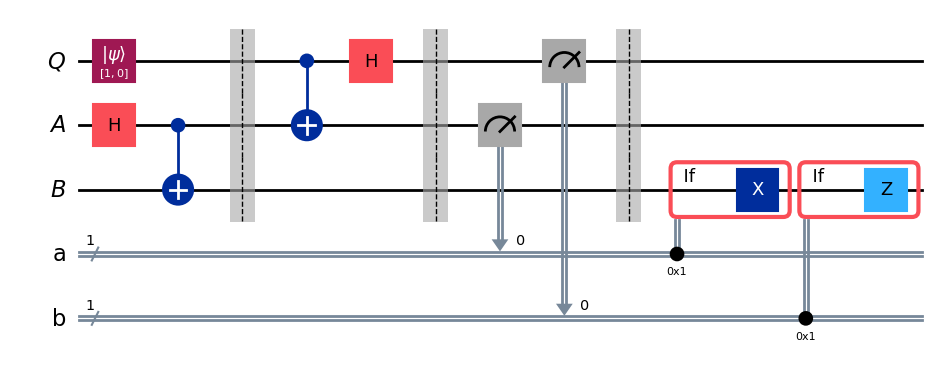

{'0 1 1': 242, '0 0 0': 247, '0 1 0': 251, '0 0 1': 260}


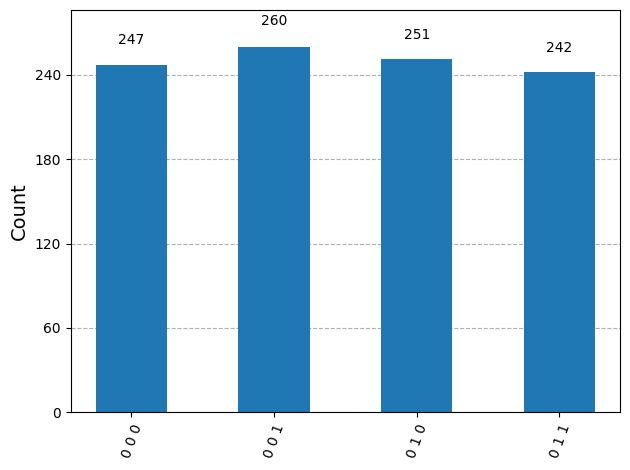

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

qc = QuantumCircuit(qubit, ebit0, ebit1, a, b)
qc.initialize([1, 0], qubit)

# Prepare ebit used for teleportation
qc.h(ebit0)
qc.cx(ebit0, ebit1)
qc.barrier()

# Alice's operations
qc.cx(qubit, ebit0)
qc.h(qubit)
qc.barrier()

# Alice measures and sends classical bits to Bob
qc.measure(ebit0, a)
qc.measure(qubit, b)
qc.barrier()

# Bob uses the classical bits to conditionally apply gates
with qc.if_test((a, 1)):
   qc.x(ebit1)
with qc.if_test((b, 1)):
    qc.z(ebit1)

display(qc.draw(output="mpl"))

#Bob measures final qubit
result = ClassicalRegister(1, "result")
qc.add_register(result)
qc.measure(ebit1, result)
# Use AerSimulator with support for dynamic circuits
sim = Aer.get_backend('aer_simulator')
# Assemble and run
job = sim.run(qc,shots=1000)
result = job.result()
# Get counts
counts = result.get_counts(qc)
print(counts)
# Plot result
plot_histogram(counts)
